## 二维Stewart平台问题
已知平台三角形三边长度$L_1,L_2,L_3$，$L_1$所对角$\gamma$，三个可伸缩的支杆的定端坐标$(0,0), (x_1,0), (x_2,y_2)$，在给定支杆长度$p_1,p_2,p_3$，求解$L_3$和x轴正半轴夹角$\theta$和$L_1$所对平台端点$(x,y)$。

In [2]:
import matplotlib.pyplot as plt
import numpy as np

$$
\begin{aligned}
p_1^2&=x^2+y^2 \\
p_2^2&=(x+A_2)^2+(y+B_2)^2 \\
p_3^2&=(x+A_3)^2+(y+B_3)^2 \\
\text{while}\qquad\\
A_2&=L_3\cos\theta-x_1 \\
B_2&=L_3\sin\theta \\
A_3&=L_2\cos{(\theta+\gamma)}-x_2=L_2[\cos\theta\cos\gamma-\sin\theta\sin\gamma]-x_2 \\
B_3&=L_2\sin{(\theta+\gamma)}-y_2=L_2[\cos\theta\sin\gamma+\sin\theta\cos\gamma]-y_2 \\
\text{then}\qquad\\
p_2^2&=p_1^2+2A_2x+2B_2y+A_2^2+B_2^2 \\
p_3^2&=p_1^2+2A_3x+2B_3y+A_3^2+B_3^2 \\
\text{as long as}\qquad\\
D&=2(A_2B_3-B_2A_3)\neq0 \\
\text{then}\qquad\\
x&=\frac{B_3(p_2^2-p_1^2-A_2^2-B_2^2)-B_2(p_3^2-p_1^2-A_3^2-B_3^2)}{2(A_2B_3-B_2A_3)}=\frac{N_1}{D} \\
y&=\frac{-A_3(p_2^2-p_1^2-A_2^2-B_2^2)+A_2(p_3^2-p_1^2-A_3^2-B_3^2)}{2(A_2B_3-B_2A_3)}=\frac{N_2}{D} \\
\text{Put x, y into the first formula}\qquad\\
f(\theta)&=N_1^2+N_2^2-p_1^2D^2,\;x\in[-\pi,\pi]\\
\text{Let f=0, then solve the equation.}\qquad
\end{aligned}
$$

In [47]:
P0 = (0, 0)
P1 = (4, 0)
P2 = (0, 4)
L1, L2, L3 = 2, np.sqrt(2), np.sqrt(2)
gamma = np.arccos((L2**2+L3**2-L1**2)/(2*L2*L3))

p1 = np.sqrt(5)
p2 = p1
p3 = p1

In [64]:
def draw(L1, L2, L3, P0, P1, P2, p1, p2, p3, theta, gamma, limL=-1, limR=5, limit=True):
    A2 = L3*np.cos(theta)-P1[0]
    B2 = L3*np.sin(theta)
    A3 = L2*np.cos(theta+gamma)-P2[0]
    B3 = L2*np.sin(theta+gamma)-P2[1]
    try:
        D = 2*(A2*B3-B2*A3)
    except ZeroDivisionError:
        print("ZeroDivisionError")
        return None
    N1 = B3*(p2**2-p1**2-A2**2-B2**2)-B2*(p3**2-p1**2-A3**2-B3**2)
    N2 = -A3*(p2**2-p1**2-A2**2-B2**2)+A2*(p3**2-p1**2-A3**2-B3**2)
    T = (N1/D, N2/D)

    T2 = (T[0]+L3*np.cos(theta), T[1]+L3*np.sin(theta))
    T3 = (T[0]+L2*np.cos(theta+gamma), T[1]+L2*np.sin(theta+gamma))
    plt.plot([T[0], T2[0], T3[0], T[0]], [T[1], T2[1], T3[1], T[1]], c='r')
    plt.plot([P0[0],  T[0]], [P0[1],  T[1]], c='b', linewidth=4)
    plt.plot([P1[0], T2[0]], [P1[1], T2[1]], c='b', linewidth=4)
    plt.plot([P2[0], T3[0]], [P2[1], T3[1]], c='b', linewidth=4)
    plt.scatter([T[0], T2[0], T3[0]], [T[1], T2[1], T3[1]], c='r', s=60, zorder=4)
    plt.scatter([P0[0], P1[0], P2[0]], [P0[1], P1[1], P2[1]], c='b', s=40)

    axes = plt.gca()
    axes.grid()
    axes.set_aspect(1)
    if limit:
        plt.ylim(limL, limR)
        plt.xlim(limL, limR)
    plt.show()


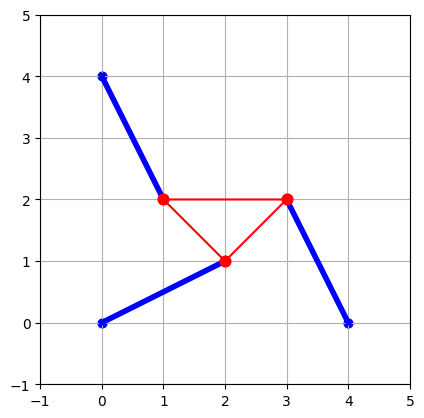

In [49]:
draw(L1, L2, L3, P0, P1, P2, p1, p2, p3, np.pi/4, gamma)

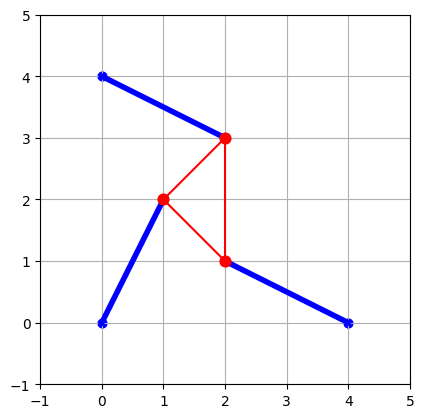

In [51]:
draw(L1, L2, L3, P0, P1, P2, p1, p2, p3, -np.pi/4, gamma)

In [11]:
def FWrapper(p1, p2, p3):
    def F(theta):
        A2 = L3*np.cos(theta)-P1[0]
        B2 = L3*np.sin(theta)
        A3 = L2*np.cos(theta+gamma)-P2[0]
        B3 = L2*np.sin(theta+gamma)-P2[1]
        try:
            D = 2*(A2*B3-B2*A3)
        except ZeroDivisionError:
            print("ZeroDivisionError")
            return None
        N1 = B3*(p2**2-p1**2-A2**2-B2**2)-B2*(p3**2-p1**2-A3**2-B3**2)
        N2 = -A3*(p2**2-p1**2-A2**2-B2**2)+A2*(p3**2-p1**2-A3**2-B3**2)
        return N1**2+N2**2-p1**2*D**2
    return F

1. 略
2. 画出区间 $[-\pi,\pi]$ 上的 $f(\theta)$。

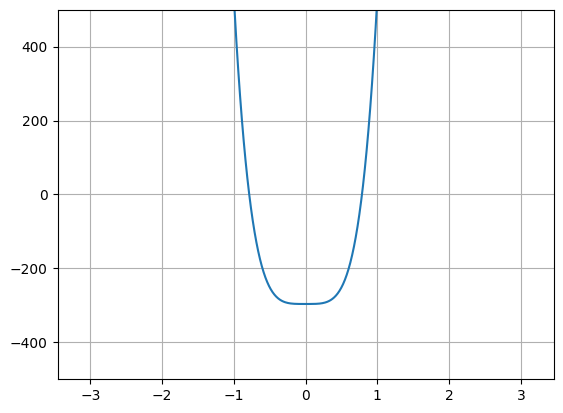

In [17]:
def drawF(p1, p2, p3, yLimLeft, yLimRight):
    f = FWrapper(p1, p2, p3)
    X = np.linspace(-np.pi, np.pi, 500)
    plt.plot(X, f(X))
    plt.ylim(yLimLeft, yLimRight)
    axes = plt.gca()
    axes.grid()
    plt.show()

drawF(p1, p2, p3, -500, 500)

3. 见上
4. 求解，其中 $x_1=5,\,(x_2,y_2)=(0,6),L_1=L3=3,L_2=3\sqrt2,\gamma=\frac{\pi}{4},p_1=p_2=5,p_3=3$ 。画出$f(\theta)$,求解出四个位置并画出来，通过验证$p_1,p_2,p_3$的长度检查结果。（？本来就是用支杆长度画出来的，检查肯定通过啊）

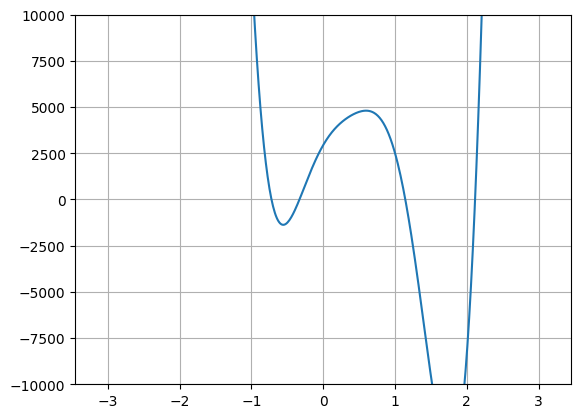

In [52]:
P1 = (5, 0)
P2 = (0, 6)
L1 = 3
L2 = 3*np.sqrt(2)
L3 = L1
gamma = np.pi/4
p1 = 5
p2 = p1
p3 = 3

drawF(p1, p2, p3, -10000, 10000)

In [24]:
GLOBAL_PRECISION = 8

def SecantLine(func, startEstimation0, startEstimation1, realRoot=None, maxIter=100):
    """
    Usage:
    :param func: The function to be solved.
    :param startEstimation0, startEstimation1: Two start estimations.
    :param maxIter: Maximum of iteration.
    """
    x0 = startEstimation0
    x1 = startEstimation1
    x2 = float('inf')

    tolerance = 10**(-GLOBAL_PRECISION)
    count = 0
    while count < maxIter:
        count += 1
        try:
            x2 = x1 - func(x1)*(x1-x0)/(func(x1)-func(x0))
        except OverflowError:
            print("OverflowError.")
            return None
        except ZeroDivisionError:
            print("ZeroDivisionError.")
            break
        print(f"Iter of {count:2d}, newPoint: {x2}.")
        if abs(x2 - x1) <= tolerance: break
        x0 = x1
        x1 = x2
    print(f"SecantLine method iterated of {count} times, with result: {x2:.{GLOBAL_PRECISION}f}")
    print(f"    Backward Error (BE): ", abs(func(x2)))
    if realRoot is not None: print(f"    Forward Error (FE): ", abs(x2-realRoot))
    print()
    return x2

In [53]:
f = FWrapper(p1, p2, p3)
r1 = SecantLine(f, -0.9, -0.6)
r2 = SecantLine(f, -0.5, -0.1)
r3 = SecantLine(f, 1, 1.5)
r4 = SecantLine(f, 2, 2.5)

Iter of  1, newPoint: -0.6516746338471031.
Iter of  2, newPoint: -0.7994408392147526.
Iter of  3, newPoint: -0.6999911949749291.
Iter of  4, newPoint: -0.7152652783374761.
Iter of  5, newPoint: -0.721358733717015.
Iter of  6, newPoint: -0.7208375660607976.
Iter of  7, newPoint: -0.7208491806070502.
Iter of  8, newPoint: -0.7208492044615074.
Iter of  9, newPoint: -0.7208492044603887.
SecantLine method iterated of 9 times, with result: -0.72084920
    Backward Error (BE):  2.1827872842550278e-11

Iter of  1, newPoint: -0.35438182036044696.
Iter of  2, newPoint: -0.3311711298934027.
Iter of  3, newPoint: -0.33100243730460177.
Iter of  4, newPoint: -0.33100518456190914.
Iter of  5, newPoint: -0.33100518428386977.
SecantLine method iterated of 5 times, with result: -0.33100518
    Backward Error (BE):  5.4569682106375694e-12

Iter of  1, newPoint: 1.1043171765023412.
Iter of  2, newPoint: 1.1347219292289923.
Iter of  3, newPoint: 1.144127719936648.
Iter of  4, newPoint: 1.143680853729105.
I

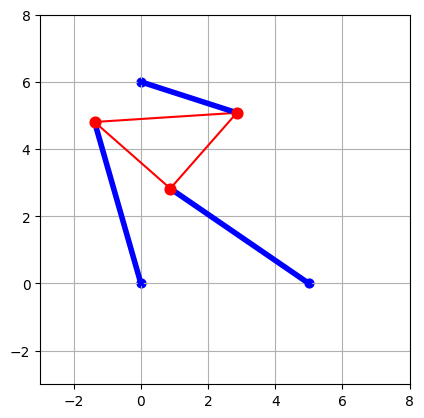

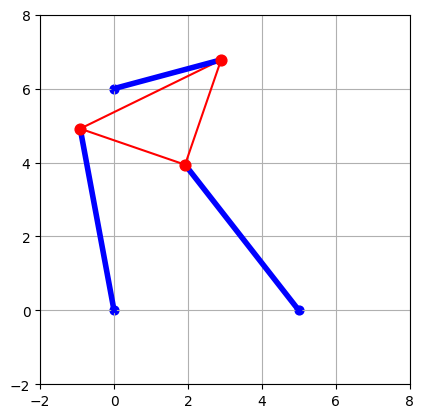

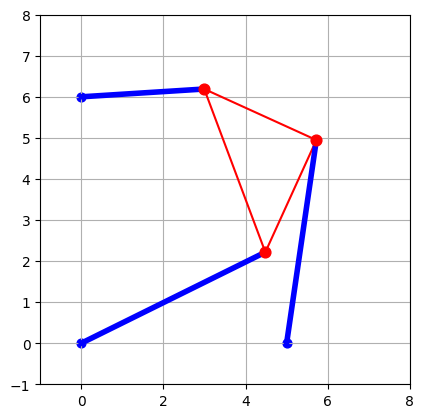

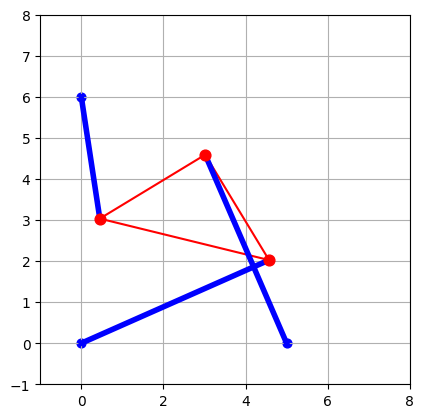

In [56]:
draw(L1, L2, L3, P0, P1, P2, p1, p2, p3, r1, gamma, -3, 8)
draw(L1, L2, L3, P0, P1, P2, p1, p2, p3, r2, gamma, -2, 8)
draw(L1, L2, L3, P0, P1, P2, p1, p2, p3, r3, gamma, -1, 8)
draw(L1, L2, L3, P0, P1, P2, p1, p2, p3, r4, gamma, -1, 8)

5. $p_2=7$ 重新求解。

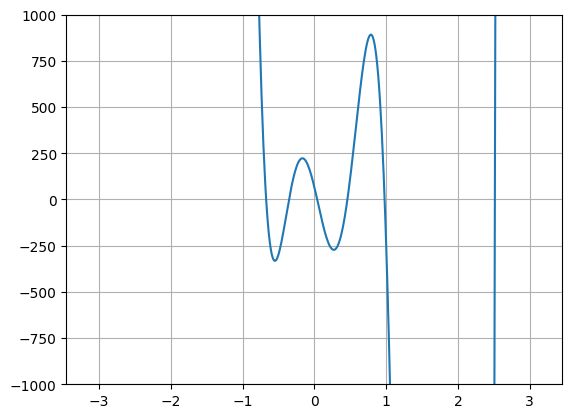

In [57]:
p2 = 7
drawF(p1, p2, p3, -1000, 1000)

In [58]:
f = FWrapper(p1, p2, p3)
r1 = SecantLine(f, -0.8, -0.6)
r2 = SecantLine(f, -0.5, -0.2)
r3 = SecantLine(f, 0, 0.1)
r4 = SecantLine(f, 0.4, 0.6)
r5 = SecantLine(f, 0.9, 1)
r6 = SecantLine(f, 2.4, 2.6)

Iter of  1, newPoint: -0.632481506426442.
Iter of  2, newPoint: -0.7045481391495352.
Iter of  3, newPoint: -0.6656872156376998.
Iter of  4, newPoint: -0.6719428712016683.
Iter of  5, newPoint: -0.6732110663539005.
Iter of  6, newPoint: -0.6731571138061263.
Iter of  7, newPoint: -0.6731574862579558.
Iter of  8, newPoint: -0.6731574863716708.
SecantLine method iterated of 8 times, with result: -0.67315749
    Backward Error (BE):  2.1827872842550278e-11

Iter of  1, newPoint: -0.32659354889290193.
Iter of  2, newPoint: -0.3728439584812053.
Iter of  3, newPoint: -0.35404268322919286.
Iter of  4, newPoint: -0.35472653049295966.
Iter of  5, newPoint: -0.3547402826228229.
Iter of  6, newPoint: -0.35474027041545875.
Iter of  7, newPoint: -0.3547402704156725.
SecantLine method iterated of 7 times, with result: -0.35474027
    Backward Error (BE):  3.637978807091713e-12

Iter of  1, newPoint: 0.03736310623425132.
Iter of  2, newPoint: 0.037769951390154564.
Iter of  3, newPoint: 0.03776676010152

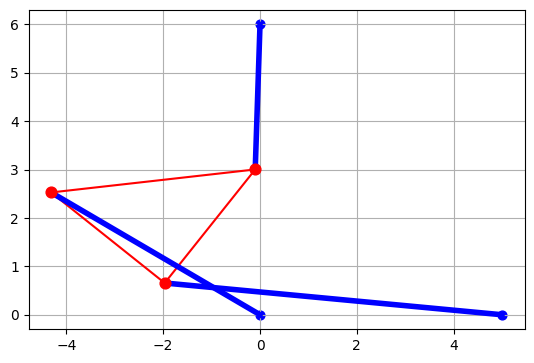

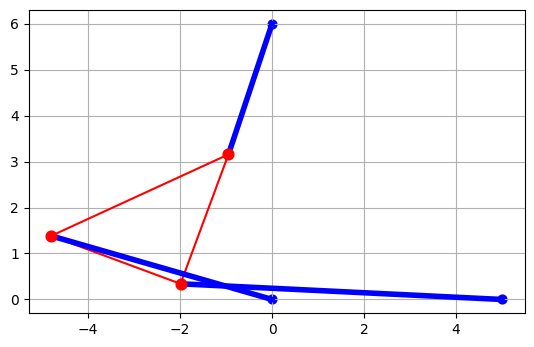

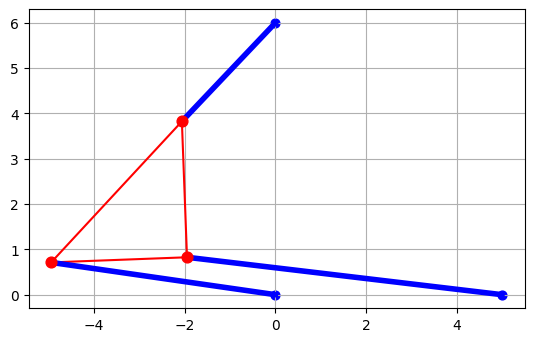

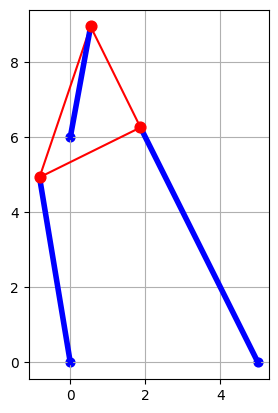

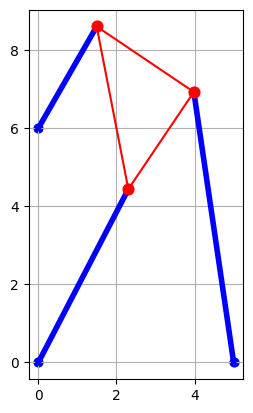

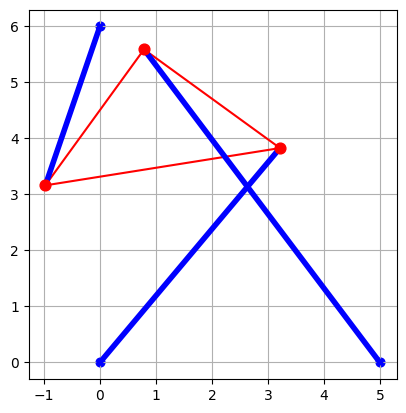

In [65]:
draw(L1, L2, L3, P0, P1, P2, p1, p2, p3, r1, gamma, limit=False)
draw(L1, L2, L3, P0, P1, P2, p1, p2, p3, r2, gamma, limit=False)
draw(L1, L2, L3, P0, P1, P2, p1, p2, p3, r3, gamma, limit=False)
draw(L1, L2, L3, P0, P1, P2, p1, p2, p3, r4, gamma, limit=False)
draw(L1, L2, L3, P0, P1, P2, p1, p2, p3, r5, gamma, limit=False)
draw(L1, L2, L3, P0, P1, P2, p1, p2, p3, r6, gamma, limit=False)

6. 找出$p_2$, 其他参数和4相同，使得其中只有两个姿态。
7. 计算$p_2$的区间，使得姿态分别有0,2,4,6个。

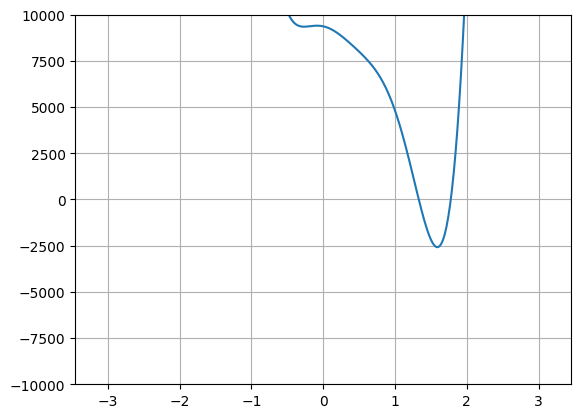

In [69]:
# TODO 找到一个优雅的办法，目前只想到了试, 估计要求导，使得某n+1阶导不为零，n阶导为0，这样就有重根了，便是分界点
drawF(p1, 4, p3, -10000, 10000)